# Анализ интернет-магазина 

### <font color=red> Краткий план работ:

    
Шаг 1. Откройте файл с данными и изучите общую информацию
    
Шаг 2. Подготовьте данные

Шаг 3. Проведите исследовательский анализ данных
    
Шаг 4. Составьте портрет пользователя каждого региона
    
Шаг 5. Проверьте гипотезы
    
Шаг 6. Напишите общий вывод
_____________________________________________
    
<span style='color:red;'>Описание данных:</span>
    
_____________________________________________
    
Name — название игры
    
Platform — платформа
    
Year_of_Release — год выпуска
    
Genre — жанр игры
    
NA_sales — продажи в Северной Америке (миллионы долларов)
    
EU_sales — продажи в Европе (миллионы долларов)
    
JP_sales — продажи в Японии (миллионы долларов)
    
Other_sales — продажи в других странах (миллионы долларов)
    
Critic_Score — оценка критиков (максимум 100)
    
User_Score — оценка пользователей (максимум 10)
    
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
________________________________________________
    
<span style='color:red;'>Описание проблемы:</span>
    
Необходимо провести анализ продаж до 2016 года, найти закономерности успеха и спрогнозировать продажи на следующие периоды.
    


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#Импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st

data_game = pd.read_csv('/datasets/games.csv')

display(data_game.info())
display(data_game.describe())
display(data_game.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Не хватает значений в колонках: name, year_of_release, genre, critic_score, user_score, rating

## Шаг 2. Подготовьте данные

In [2]:
#Приведем название столбцов к нижнему регистру
data_game.columns = data_game.columns.str.lower()
data_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#Преобразуем данные к нужным типам
#Столбец с датой релиза переведем в формат даты, а затем сделаем тип int, тк это целочисленное значение
data_game['year_of_release'] = pd.to_datetime(data_game['year_of_release'], format='%Y-%m-%d')
data_game['year_of_release'] = data_game['year_of_release'].astype(int)
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Посмотрим пропущенные значения
data_game['genre'] = data_game['genre'].fillna(value=0)

#Две игры без имени и без жанра
#Уберем эти две строки
data_game.dropna(subset=['name'], inplace=True)
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [5]:
#пропущенные значения в столбце с оценкой критиков и оценкой пользователей заполним медианой
#Значение tbd(to be confirmed) заменим на 0, тк этих значений нет и они будут объявлены позже
data_game.loc[data_game['user_score'] == 'tbd','user_score'] = 0
data_game['user_score'] = data_game['user_score'].astype(float)
#critic_score_avg = data_game['critic_score'].median()
#user_score_avg = data_game['user_score'].median()

#data_game['critic_score'] = data_game['critic_score'].fillna(value=critic_score_avg)
#data_game['user_score'] = data_game['user_score'].fillna(value=user_score_avg)

#Разработчики игр могут не предоставлять возрастной рейтинг только в случае, если игра не вышла, значит у всех игр
#в данной таблице он есть, заменим пропущенные значение на "E" - everyone, то есть игры для всех от 10 лет.
#data_game['rating'] = data_game['rating'].fillna('E')

In [6]:
#Посчитаем суммарные продажи со всех регионов
data_game['all_sales'] = data_game['na_sales'] + data_game['eu_sales'] + data_game['jp_sales'] + data_game['other_sales']
#data_game['year_of_release'].value_counts()
data_game = data_game.loc[data_game['year_of_release'] != -9223372036854775808]
#data_game = data_game.loc[data_game['genre'] >= 30]
data_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод 

Преобразовали данные в столбце по "год выпуска"

Убрали две строки где нет названи игр и жанра, думаю для такого массива это не критично, тк данные эти мы не можем вычислить.

<del>#Заменили пропуски на медианые значения.&lt;s&gt;</del> upd.1 Оставили пропуски

Скорее всего пропуски в оценках связаны с человеческим фактором, люди просто не захотели оценивать.
Пропуск с рейтингом может быть связан: А) Игра очень давно выпущена, например Марио, и такого рейтинга еще не существовало; Б) Игра получила рейтинг от какой либо другой организации

Так же посчитали общие продажи

## Шаг 3. Проведите исследовательский анализ данных

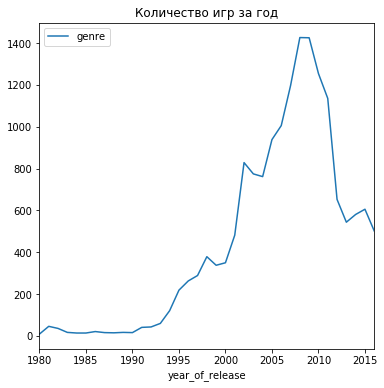

In [7]:
#посмотрим сколько игр выпускалось в разные годы
data_release = data_game.pivot_table(index=['year_of_release'], values='genre', aggfunc='count')
data_release = data_release.reset_index()
#data_release_all

#мы имеем 269 игр неизвестно какого года
#откинем эти данные
#data_game = data_game.loc[data_game['year_of_release'] != -9223372036854775808]
data_release.head()
data_release.plot(x='year_of_release', y='genre', figsize=(6,6), title='Количество игр за год')

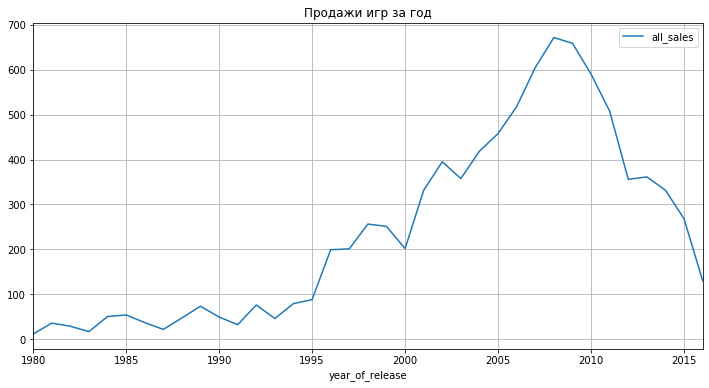

In [8]:
#Посмотрим, как менялись продажи по платформам
data_platform_sales = data_game.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum')
data_platform_sales = data_platform_sales.reset_index()
(data_platform_sales
    .pivot_table(index='year_of_release', values='all_sales',
aggfunc='sum')
    .plot(grid=True, figsize=(12,6), title='Продажи игр за год'))
#ВОпрос, как определить характерный срок по новым и старым платформам?

7.066666666666666

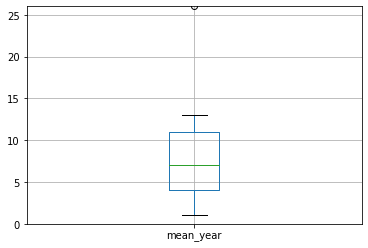

In [9]:
#Найдем среднее значение продолжительности существования платформы
data_platform_mean = data_platform_sales.pivot_table(index='platform', values='year_of_release', aggfunc='count')
data_platform_mean = data_platform_mean.reset_index()
data_platform_mean.columns = ['platform', 'mean_year']
#Проверим есть ли выбросы
plt.ylim(0, 26)
data_platform_mean.boxplot('mean_year')
#основная часть значений лежит в промежутке от 1 года до 13 лет
#отбросим остальные значения
data_platform_mean = data_platform_mean.loc[(data_platform_mean['mean_year'] != 26)]
data_platform_mean['mean_year'].mean()

upd.1 Средняя продолжительность существования платформы 7 лет.
Откинул показатель в 26 лет у PC, тк персональные компьютеры считаются с момента их существования что не очень корректно.

In [10]:
#Определим актуальный период
#Тк Новое поколение приставок вышло в 2013 году то возьмем данные за 4 года
data_actual = data_game.loc[data_game['year_of_release'] >= 2013]

In [44]:
#Потенциально прибыльные платформы:PS4 и XOne
#В 2016 году они показывают слабую динамику, но данные за этот год не полные, поэтому возьмем это за погрешность
#Прибыль остальных идет на убыль 
data_platform_actual = data_actual.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum')
data_platform_actual = data_platform_actual.reset_index()
#data_platform_actual.head()
data_actual_XOne = data_actual.loc[data_actual['platform'] == 'XOne']
data_actual_PS4 = data_actual.loc[data_actual['platform'] == 'PS4']
data_actual_3DS = data_actual.loc[data_actual['platform'] == '3DS']
data_actual_PS4 = data_actual_PS4.loc[(data_actual_PS4['critic_score'] != 0)]
data_actual_XOne = data_actual_XOne.loc[(data_actual_XOne['critic_score'] != 0)]
data_actual_3DS = data_actual_3DS.loc[(data_actual_3DS['critic_score'] != 0)]
data_actual_PS4 = data_actual_PS4.loc[(data_actual_PS4['user_score'] != 0)]
data_actual_XOne = data_actual_XOne.loc[(data_actual_XOne['user_score'] != 0)]
data_actual_3DS = data_actual_3DS.loc[(data_actual_3DS['user_score'] != 0)]
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Text(0.5, 1, 'Продажи по платформам')

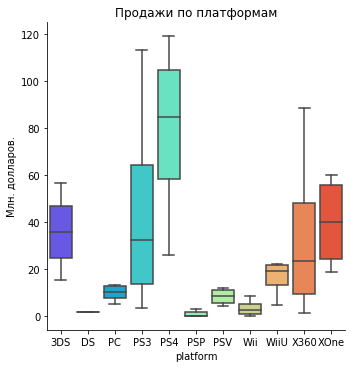

In [12]:
#Построим график «ящик с усами» по глобальным продажам для каждой платформы

sns.catplot(x='platform',y='all_sales',kind='box', data=data_platform_actual, palette='rainbow')
#sns.catplot(by = 'platform', column = 'all_sales', )
plt.ylabel("Млн. долларов.")
plt.title("Продажи по платформам")

Как я и предполагал, два явных фаворита это PS4 его общие и средние продажи сильно больше остальных, и XOne, по общим продажам он уступает PS3, но средние все равно выше, разница по продажам нивелируется в течение 2-3 лет, тк это приставка нового поколения и она будет существовать на рынке дольше, а новые игры на PS3 уже перестали выпускаться.

upd.1 разница между платформами может формироваться из множества факторов: 1. Регион, как мы выясним далее; 2. Затраты на рекламу; 3. Известность бренда; 4. Год выпуска платформ и актуальность игр к ней

Корреляция PS4_critic = 0.4064685741971657


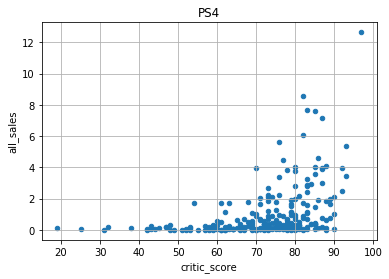

In [102]:
#Посмотрим как влияют отзывы критиков и покупателей на продажи игр на примере платформы PS4
#Построим диаграмму размаха для критиков
data_actual_PS4.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, title='PS4')
#Посчитаем корреляцию для критиков
print('Корреляция PS4_critic =', data_actual_PS4['critic_score'].corr(data_actual_PS4['all_sales']))

Корреляция PS4 = -0.031957110204556424


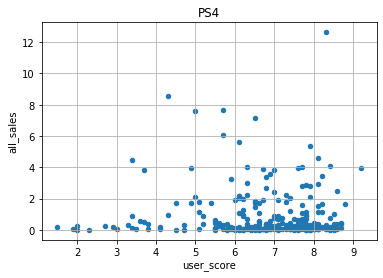

In [46]:
#Построим диаграмму размаха для покупателей
data_actual_PS4.plot(x='user_score', y='all_sales', kind='scatter', grid=True, title='PS4')
#Посчитаем корреляцию  для покупателей
print('Корреляция PS4 =', data_actual_PS4['user_score'].corr(data_actual_PS4['all_sales']))

Вывод:

Низкая корреляция у обеих показателей, это свидетельствует что оценки ни критиков, ни пользователей никак не связаны с продажами.

Самые продаваемые игры имеют самый высокий рейтинг критиков, это объясняемо авторитетностью изданий, которые их предоставляю, что своего рода является рекламой.

У оценки пользователей все сложнее, данные слишком разрозненные, я бы не стал их брать в расчет, но они тоже объясняемы, тк у каждого человека свои вкусовые предпочтения как в играх, так и во всем остальном.

Корреляция XOne = 0.41215586820316974
Корреляция 3DS = 0.3392349287853147


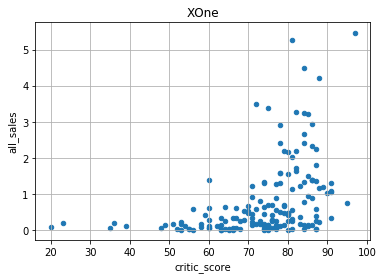

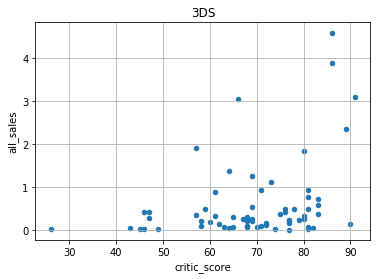

In [47]:
#Посмотрим как влияют отзывы критиков и покупателей на продажи игр на примере платформ XOne и 3DS
#Построим диаграмму размаха для критиков XOne
data_actual_XOne.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, title='XOne')
#Посчитаем корреляцию для критиков XOne
print('Корреляция XOne =', data_actual_XOne['critic_score'].corr(data_actual_XOne['all_sales']))

#Построим диаграмму размаха для критиков 3DS
data_actual_3DS.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, title='3DS')
#Посчитаем корреляцию для критиков 3DS
print('Корреляция 3DS =', data_actual_3DS['critic_score'].corr(data_actual_3DS['all_sales']))

Корреляция XOne = -0.06892505328279414
Корреляция 3DS = 0.24150411773563016


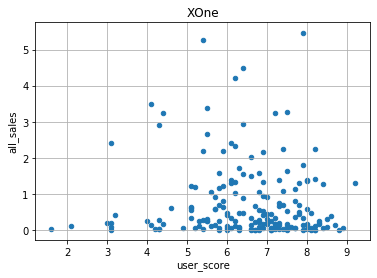

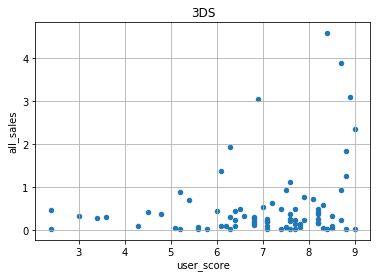

In [48]:
#Построим диаграмму размаха для покупателей XOne
data_actual_XOne.plot(x='user_score', y='all_sales', kind='scatter', grid=True, title='XOne')
#Посчитаем корреляцию  для покупателей XOne
print('Корреляция XOne =', data_actual_XOne['user_score'].corr(data_actual_XOne['all_sales']))
#Построим диаграмму размаха для покупателей 3DS
data_actual_3DS.plot(x='user_score', y='all_sales', kind='scatter', grid=True, title='3DS')
#Посчитаем корреляцию  для покупателей 3DS
print('Корреляция 3DS =', data_actual_3DS['user_score'].corr(data_actual_3DS['all_sales']))

In [98]:
# Создадим функцию
def create_plot (data, x, y, z):
    
    plot = data.plot(x, y, kind='scatter')
    plt.title(z)
    plt.xlabel(x)
    plt.ylabel(y) 
    plt.show()

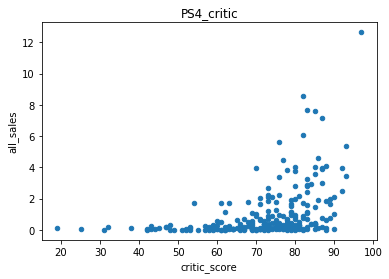

Корреляция PS4_critic = 0.4064685741971657


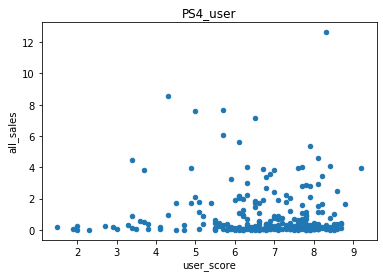

Корреляция PS4_user = -0.031957110204556424


In [103]:
PS4_critic = create_plot(data_actual_PS4, 'critic_score', 'all_sales', 'PS4_critic')
print('Корреляция PS4_critic =', data_actual_PS4['critic_score'].corr(data_actual_PS4['all_sales']))
PS4_user = create_plot(data_actual_PS4, 'user_score', 'all_sales', 'PS4_user')
print('Корреляция PS4_user =', data_actual_PS4['user_score'].corr(data_actual_PS4['all_sales']))

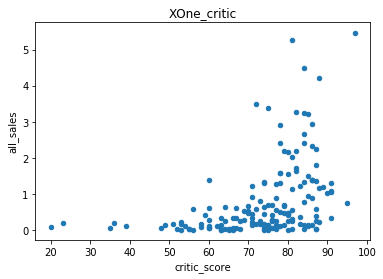

Корреляция XOne_critic = 0.41215586820316974


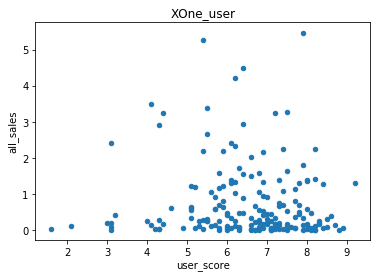

Корреляция XOne_user = -0.06892505328279414


In [104]:
XOne_critic = create_plot(data_actual_XOne, 'critic_score', 'all_sales', 'XOne_critic')
print('Корреляция XOne_critic =', data_actual_XOne['critic_score'].corr(data_actual_XOne['all_sales']))
XOne_user = create_plot(data_actual_XOne, 'user_score', 'all_sales', 'XOne_user')
print('Корреляция XOne_user =', data_actual_XOne['user_score'].corr(data_actual_XOne['all_sales']))

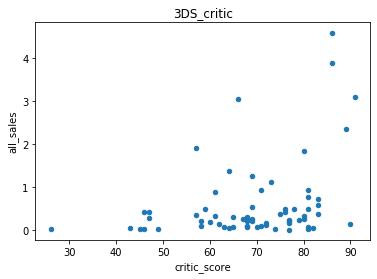

Корреляция 3DS_critic = 0.3392349287853147


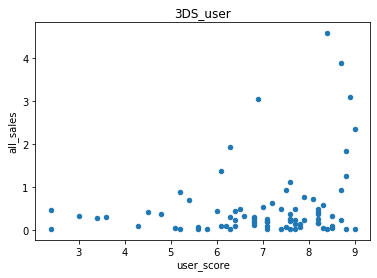

Корреляция 3DS_user = 0.24150411773563016


In [106]:
DS_critic = create_plot(data_actual_3DS, 'critic_score', 'all_sales', '3DS_critic')
print('Корреляция 3DS_critic =', data_actual_3DS['critic_score'].corr(data_actual_3DS['all_sales']))
DS_user = create_plot(data_actual_3DS, 'user_score', 'all_sales', '3DS_user')
print('Корреляция 3DS_user =', data_actual_3DS['user_score'].corr(data_actual_3DS['all_sales']))

upd.1 Вывод:

На двух других популярных платформах XOne и 3DS низкая корреляция, значит зависимость отсутствует.

Отличительной особенностью является то, что у приставок 3DS отзывы как критиков так и пользователей сильно влияют на продажи, чем выше оценка, тем соответственно выше продажи, в то время как у XOne  наибольшие продажи связаны со средними показателями и игры со средней оценкой имеют хорошие продажи.

upd.2 Автоматизировал, старые расчеты убирать не стал, как работа над ошибками

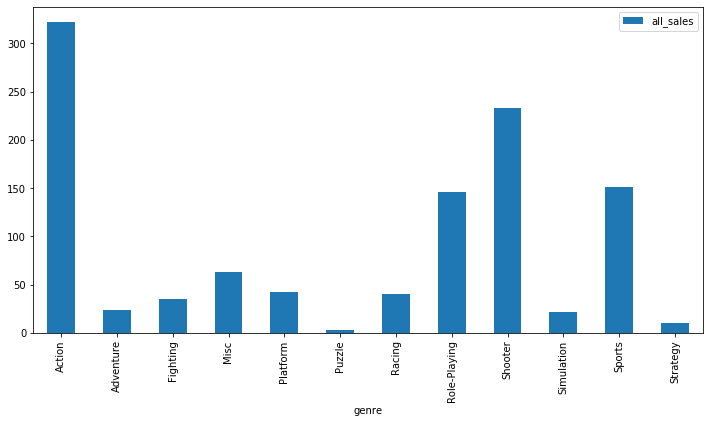

In [17]:
#Посмотрим на общее распределение игр по жанрам
data_actual['genre'].value_counts()
#Составим диаграмму чтобы увидеть зависимость
(data_actual
        .pivot_table(index='genre', values='all_sales',
aggfunc='sum')
        .plot(figsize=(12, 6), kind='bar')
);

Самые продаваемые жанры игр это: "экшн", "шутер" и "спорт".
Самые низкие продажи у "пазл" и "стратегий"

### Вывод

Мы нашли странные даты по году выпуска и отсеяли их, так же отсеяли игры до 2013 года, чтобы составить прогноз.

Если смотреть на изменения продаж по годам в разрезе платформ, то можно заметить, что у каждой платформы есть пиковое значение и падение, у двух платформ это падение минимально: PS4 и XOne.

На диаграмме размаха мы увидели, что самые большие тотал и средние продажи у платформы PS4

Мы не нашли явного влияния оценки критиков и оценки пользователей на продажи игр, но есть одна закономерность, чем выше рейтинг критика, тем больше продаж у игры.

Так же мы нашли самые продаваемые жанры: "action", "shooter", "sport".

## Шаг 4. Составьте портрет пользователя каждого региона

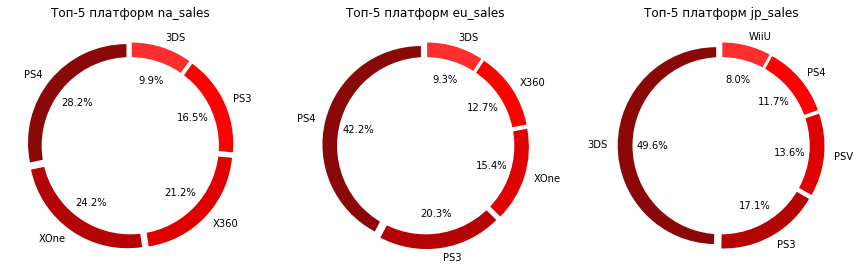

In [18]:
#Определим для пользователя каждого региона (NA, EU, JP):
#Топ-5 популярных платформ
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 10)
 
num_of_subplot = 0
 
for region in ['na_sales', 'eu_sales', 'jp_sales']:
 
    pltf_top_5 = (data_actual.groupby('platform')[region].sum()).reset_index().sort_values(by= region,ascending=False).head()
   
 
    ax[num_of_subplot].set_title('Топ-5 платформ' + ' ' + region)
    figsize=(20, 9)
    colors = ['#8A0808','#B40404','#DF0101','#FF0000','#FE2E2E']
    ax[num_of_subplot].pie(pltf_top_5 [region],
              labels=pltf_top_5.platform,
              autopct='%1.1f%%',
              pctdistance=0.65,
              startangle=90,
              explode=(0.05,0.05,0.05,0.05, 0.05),
              colors=colors)
    centre_circle = plt.Circle((0,0),0.90,fc='white')
    ax[num_of_subplot].add_artist(centre_circle)
   
    num_of_subplot += 1
 
   
plt.show()

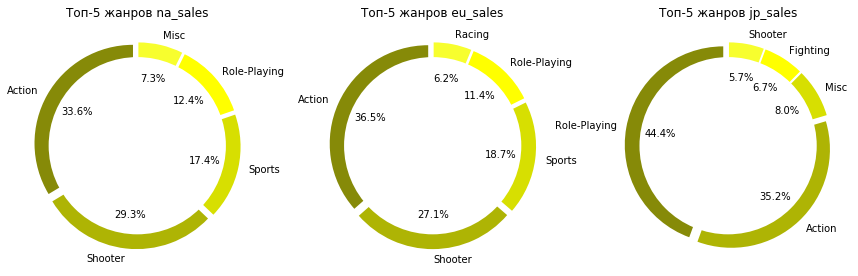

In [19]:
#Топ-5 популярных жанров
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 10)
 
num_of_subplot = 0
 
for region in ['na_sales', 'eu_sales', 'jp_sales']:
 
    genre_top_5 = (data_actual.groupby('genre')[region].sum()).reset_index().sort_values(by= region,ascending=False).head()
   
 
    ax[num_of_subplot].set_title('Топ-5 жанров' + ' ' + region)
    figsize=(20, 9)
    colors = ['#868A08','#AEB404','#D7DF01','#FFFF00','#F7FE2E']
    ax[num_of_subplot].pie(genre_top_5 [region],
              labels=genre_top_5.genre,
              autopct='%1.1f%%',
              pctdistance=0.65,
              startangle=90,
              explode=(0.05,0.05,0.05,0.05, 0.05),
              colors=colors)
    centre_circle = plt.Circle((0,0),0.90,fc='white')
    ax[num_of_subplot].add_artist(centre_circle)
   
    num_of_subplot += 1
 
   
plt.show()

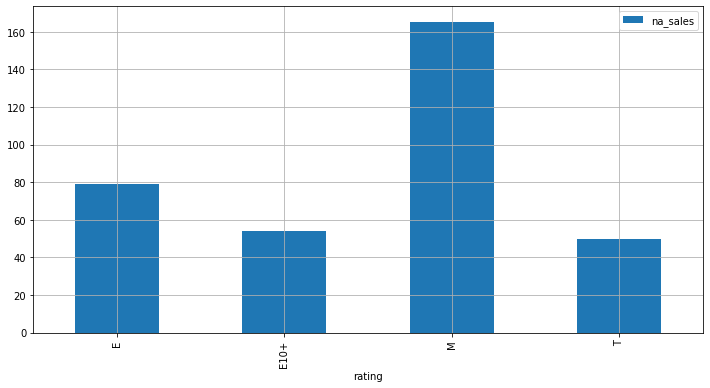

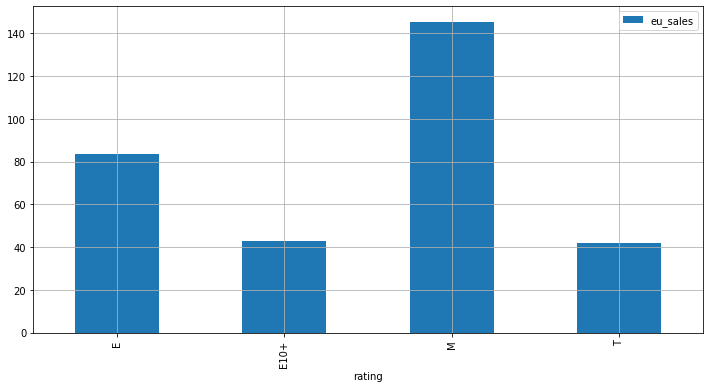

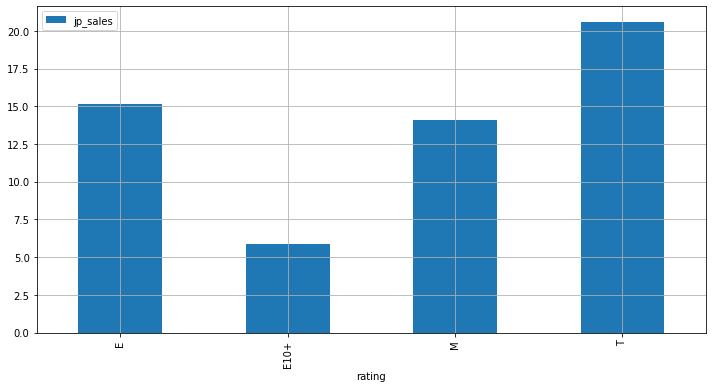

In [107]:
#Влияние рейтинга ESRB
#регион na
(data_actual
        .pivot_table(index='rating', values='na_sales',
aggfunc='sum')
        .plot(kind='bar', grid=True, figsize=(12, 6))
);

#регион eu
(data_actual
        .pivot_table(index='rating', values='eu_sales',
aggfunc='sum')
        .plot(kind='bar', grid=True, figsize=(12, 6))
);
#регион jp
(data_actual
        .pivot_table(index='rating', values='jp_sales',
aggfunc='sum')
        .plot(kind='bar', grid=True, figsize=(12, 6))
);

## Вывод

Мы определили самые популярные в регионах na, eu, jp, кардинально картина отличается только в jp, там самой популярной приставкой является 3DS.

Так же регион jp выделился и по части продаж по жанрам, у него лидируют "ролевые" игры, тогда как в остальных "экшн".

То же самое можно сказать и по возрастному рейтингу, в na и eu самые большие продажи показывают два рейтинга "E" и "M", в jp самым продаваемым жанром является "T"

Upd.1 В первую очередь различия формируются из-за минталитета, у европейцев и американцев он явно более схож, чем у стран из Азии.

## Шаг 5. Проверьте гипотезы

Сформулируем нулевую гипотезу:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем альтернативную гипотезу:
Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [35]:

#Создадим две таблицы с платформами
XOne_rating = data_actual.loc[data_actual['platform'] == 'XOne']
PC_rating = data_actual.loc[data_actual['platform'] == 'PC']
XOne_rating['user_score'] = XOne_rating['user_score'].fillna(0)
PC_rating['user_score'] = PC_rating['user_score'].fillna(0)
XOne_rating = XOne_rating.loc[(XOne_rating['user_score'] != 0)]
PC_rating = PC_rating.loc[(PC_rating['user_score'] != 0)]

alpha = .05 #стандартное значение

results_platform = st.ttest_ind(
    XOne_rating['user_score'],
    PC_rating['user_score'])

print('p-значение: ', results_platform.pvalue) 

if (results_platform.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
# Пример
XOne_rating['user_score']

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [37]:
# Пример
PC_rating['user_score']

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

upd.2 исправил

Сформулируем нулевую гипотезу:
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем альтернативную гипотезу:
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [38]:
#Создадим две таблицы с платформами
action_rating = data_actual.loc[data_actual['genre'] == 'Action']
sports_rating = data_actual.loc[data_actual['genre'] == 'Sports']
action_rating['user_score'] = action_rating['user_score'].fillna(0)
sports_rating['user_score'] = sports_rating['user_score'].fillna(0)
action_rating = action_rating.loc[(action_rating['user_score'] != 0)]
sports_rating = sports_rating.loc[(sports_rating['user_score'] != 0)]

alpha = .05 #стандартное значение

results_genre = st.ttest_ind(
    action_rating['user_score'],
    sports_rating['user_score'])

print('p-значение: ', results_genre.pvalue) 

if (results_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [39]:
# Пример
sports_rating['user_score']

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 160, dtype: float64

In [40]:
# Пример
sports_rating['user_score']

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 160, dtype: float64

## Шаг 6. Напишите общий вывод

1. Нашли пропущенные значения в столбцах: name, year_of_release, genre, critic_score, user_score, rating. Удалили строки где все данные были пустыми.
2. Преобразовали столбец с годом в целочисленное значение и преобразовали значение "tbd" в 0.
3. Предполагаю что пропущенные значения связаны с человеческим фактором или банальным отсутствием информации, тк закономерностей найдено не было.
4. Пик по выпуску игр пришелся на 2008 год. Далее была регрессия.
5. Пик продаж так же пришелся на 2008 год, что не удивительно.
6. Мы выяснили, что средняя продолжительность жизни консоли составляет 7 лет, в этот расчет не попали ПК, тк они существуют уже более 26 лет.
7. Актуальный период брался 4 последних года, тк в это время вышли последние консоли.
8. Самыми перспективными консолями являются PS4 и XOne.
9. PS4 является лидером по абсолютным и средним продажам в целом по миру.
10. Так же мы выяснили, что у трех самых популярных платформ нет прямой зависимости от оценок критиков или пользователей.
11. У самых продаваемых игр как правило самые высокие оценки критиков.
12. Самые популярные жанры в продажах являются "экшн", "шутер" и "спорт".
13. В разных регионах разная популярность у одних и тех же консолей, в Европе лидирует PS4, в Америке с небольшим отрывом так же лидирует PS4, в Японии почти половину рынка занимает 3DS.
14. Самыми популярными жанрами в Европе и Америке являются "экшн" и "шутер", тогда как в Японии правят "ролевые" игры.
15. В связи с различием в менталитетах, рейтинги в Америке и Европе поделились поровну между 'E' и 'М', в Японии самый популярный рейтинг 'T'.
16. При проверке нулевых гипотез нам удалось понять: А) Средний пользовательский рейтинг у платформ XOne и PC - одинаковый; Б) Средний пользовательский рейтинг жанров Action и Sports разный.
17. Необходимо делать ставку на игры для PS4 в жанре 'Action' с рейтингом 'E'.